In [334]:
from sklearn.metrics import mean_squared_error
from math import sqrt # rms = sqrt(mean_squared_error(y_true, y_predicted))
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# linear regression models
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 15, 6
# cross val, k-folds
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline
import re
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import seaborn as sns
import numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
%matplotlib inline
np.random.seed()
#df = pd.read_csv('bcp.csv')
k = pd.read_csv('hpi.csv')
k.head()

,Unnamed: 0,area,benchmark_price,month,price_index,property_type,year,benchmark_price_string
0,0,vancouver_east,396100,January,116.0,Residential - All Types,2006.0,"$396,100"
1,1,vancouver_east,514400,January,113.7,Detached,2006.0,"$514,400"
2,2,vancouver_east,363500,January,119.3,Townhouse,2006.0,"$363,500"
3,3,vancouver_east,215500,January,118.9,Apartment,2006.0,"$215,500"
4,4,vancouver_east,405000,February,118.6,Residential - All Types,2006.0,"$405,000"


/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


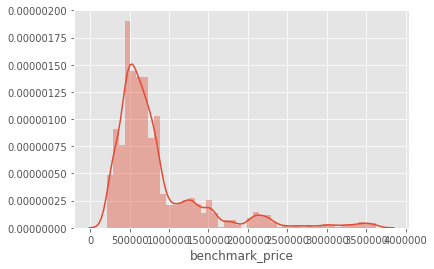

In [335]:
sns.distplot(k['benchmark_price'])

In [336]:
k.benchmark_price=k.benchmark_price.astype(float)
#minimum na values so ok to fill na
k['month']=k.month.fillna(k.month.mode())

In [337]:
#convert month to numeric
meta_dict = { 'January':int, 'February':int, 'March':int, 'April':int,'May':int,'June':int,'July':int,'August':int,'September':int,'October':int,'November':int,'December':int}
my_dict = {'January':"1", 'February':"2", 'March':"3", 'April':"4",'May':"5",'June':"6",'July':"7",'August':"8",'September':"9",'October':"10",'November':"11",'December':"12"}  # adding a string key for the demo
d= { k:meta_dict.get(k,str)(v) for k,v in my_dict.items()}
k.month = k.month.map(d)

In [338]:
k.month=k['month'].fillna(0).astype(int)
k.month.isnull().sum()

0

In [339]:
#change data type to int for parsing
k.month=k.month.astype(int)
k.to_csv('mydata.csv')

In [340]:
k

,Unnamed: 0,area,benchmark_price,month,price_index,property_type,year,benchmark_price_string
0,0,vancouver_east,396100.0,1,116.0,Residential - All Types,2006.0,"$396,100"
1,1,vancouver_east,514400.0,1,113.7,Detached,2006.0,"$514,400"
2,2,vancouver_east,363500.0,1,119.3,Townhouse,2006.0,"$363,500"
3,3,vancouver_east,215500.0,1,118.9,Apartment,2006.0,"$215,500"
4,4,vancouver_east,405000.0,2,118.6,Residential - All Types,2006.0,"$405,000"
5,5,vancouver_east,526200.0,2,116.3,Detached,2006.0,"$526,200"
6,6,vancouver_east,368900.0,2,121.1,Townhouse,2006.0,"$368,900"
7,7,vancouver_east,220600.0,2,121.7,Apartment,2006.0,"$220,600"
8,8,vancouver_east,414200.0,3,121.3,Residential - All Types,2006.0,"$414,200"
9,9,vancouver_east,537900.0,3,118.9,Detached,2006.0,"$537,900"


In [343]:
#parse to date time
def parse(x):
    return datetime.strptime(x, '%Y %M')
dataset = pd.read_csv('hpi_month.csv',  parse_dates = [['year', 'month']], index_col=0, date_parser=parse)

In [345]:
# manually specify column names
df=dataset[['area','benchmark_price','property_type']]

In [346]:
#select vancouver east
df_east=df[df['area']=='vancouver_east']

In [347]:
len(df_east)

580

In [348]:
#select apartment property price
df_east=df_east[df_east['property_type']=='Apartment']

In [349]:
df_east=df_east[['benchmark_price']]

In [350]:
#encoder = LabelEncoder()
#df_east['Area']= encoder.fit_transform(df_east.Area)
len(df_east)

145

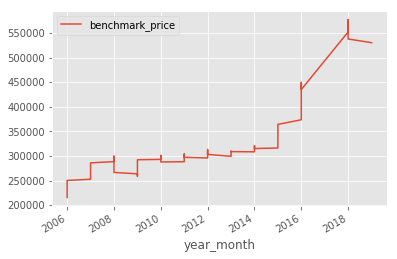

In [351]:
df_east.plot()

In [352]:
df_east.shape

(145, 1)

In [358]:
# frame a sequence as a supervised learning problem
def convert_supervised(df):
    columns = [df.shift(i) for i in range(1, 2)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(400, batch_input_shape=(batch_size, X.shape[1], X.shape[2]),dropout=.3, stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model
 
# make a one-step forecast

def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size, verbose=0)
    return yhat[0,0]

In [359]:
#convert df to values
#take the difference to make it stationary
raw_values = df_east.values
diff_values = difference(raw_values, 1)
#create a dataframe
df = pd.DataFrame(diff_values)

In [360]:
# transform data to be supervised learning
supervised = convert_supervised(df)
supervised_values = supervised.values
# split data into train and test-sets
#train_size = int(len(supervised_values) * 0.7)
#train, test = supervised_values[0:train_size], supervised_values[train_size:len(supervised_values)]

# transform the scale of the data
#scaler, train_scaled, test_scaled = scale(train, test)


In [361]:
from matplotlib import pyplot
np.random.seed()
# fit the model
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]
#------------------------------------------------------------------------------------------------ 
# transform the scale of the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train)
#reshape train for numpy
train = train.reshape(train.shape[0], train.shape[1])
train_scaled = scaler.transform(train)
#reshape test for numpy
test = test.reshape(test.shape[0], test.shape[1])
test_scaled = scaler.transform(test)
#------------------------------------------------------------------------------------------------
# fit the model

lstm_model = fit_lstm(train_scaled, 1, 20, 2)


/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


No handles with labels found to put in legend.


Month=1, Predicted=563587.643361, Expected=565300.000000
Month=2, Predicted=570454.157141, Expected=577600.000000
Month=3, Predicted=585480.389073, Expected=574700.000000
Month=4, Predicted=583412.420046, Expected=575800.000000
Month=5, Predicted=584963.684878, Expected=573800.000000
Month=6, Predicted=582220.934263, Expected=569100.000000
Month=7, Predicted=577437.777022, Expected=569300.000000
Month=8, Predicted=578236.204737, Expected=575700.000000
Month=9, Predicted=584474.468142, Expected=569100.000000
Month=10, Predicted=576086.460289, Expected=551400.000000
Month=11, Predicted=558682.566348, Expected=538000.000000
Month=12, Predicted=546869.786841, Expected=530500.000000
Test RMSE: 13351.459


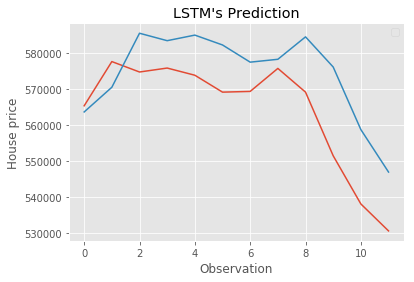

In [362]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('House price')
plt.legend()
pyplot.show()

In [267]:
# last value of our dataset
f = np.array(570)
# sklearn minmaxscaler for converting "f" to range to (-1,1)
scaler = MinMaxScaler(feature_range=(-1, 1))
# minmaxscaler fit
scaler = scaler.fit(f)
# let's transform
train = f.reshape(1, 1)
train_scaled = scaler.transform(train)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [190]:
# initial record
initial = train_scaled
train_scaled.shape
# store prediction
prediction = []
# range 40 because we want the prediction for next 40 months
for i in range(20):
    # predict 
    yhat = forecast_lstm(lstm_model, 1, initial)
    # inverse prediction to it's original value
    yhat_inver = scaler.inverse_transform(yhat)
    # append to our prediction variable
    prediction.append(yhat_inver)
    # re initial our initial variable so that it feed the current predicted value as input for forecast
    initial = np.array([yhat])



In [191]:
prediction = np.concatenate(prediction, axis=0 ).tolist()
prediction = [item for sublist in prediction for item in sublist]
prediction = pd.DataFrame(prediction)

In [192]:
rng = pd.date_range('2019-08-31 00:00:00', periods=20, freq='M')
rng = pd.DataFrame(rng)
prediction = pd.merge(rng, prediction, left_index=True, right_index=True, how='outer')
prediction.columns = ['Date', 'Price']
kl=prediction.head(20)

In [193]:
kl

,Date,Price
0,2019-08-31,570.647827
1,2019-09-30,570.761963
2,2019-10-31,570.704956
3,2019-11-30,570.583435
4,2019-12-31,570.488770
5,2020-01-31,570.468994
6,2020-02-29,570.516602
7,2020-03-31,570.583130
8,2020-04-30,570.619019
9,2020-05-31,570.610657


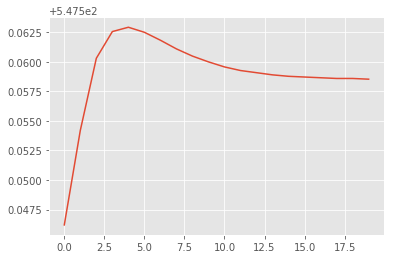

In [300]:
kl.Price.plot()